In [25]:
import pandas as pd

# Load the dataset
# main_df = pd.read_excel(file_path)
main_df = pd.read_feather("../../peskas.kenya.data.pipeline/inst/data/legacy_dat_processed.feather")

# Ensure date parsing is done
if not pd.api.types.is_datetime64_any_dtype(main_df['landing_date']):
    main_df['landing_date'] = pd.to_datetime(main_df['landing_date'], errors='coerce')

# Extract year, month, and day from the 'Date' column
main_df['Year_Extracted'] = main_df['landing_date'].dt.year.astype(int)
main_df['Month_Extracted'] = main_df['landing_date'].dt.month.astype(int)
main_df['Day_Extracted'] = main_df['landing_date'].dt.day.astype(int)

# Ensure the 'Month_Extracted' and 'Day_Extracted' columns are integers
main_df['Month_Extracted'] = main_df['Month_Extracted'].astype(int)
main_df['Day_Extracted'] = main_df['Day_Extracted'].astype(int)

# Create a DataFrame with the necessary columns renamed for date construction
date_columns = main_df.rename(columns={'Year_Extracted': 'year', 'Month_Extracted': 'month', 'Day_Extracted': 'day'})

# Create the corrected date using the renamed columns for year, month, and day
main_df['Corrected_Date'] = pd.to_datetime(date_columns[['year', 'month', 'day']], errors='coerce')

# Use the corrected date for further analysis
main_df['landing_date'] = main_df['Corrected_Date']
main_df.drop(columns=['Year_Extracted', 'Month_Extracted', 'Day_Extracted', 'Corrected_Date'], inplace=True)

# Extract year from the corrected 'Date' column for trend analysis
main_df['Year_Extracted'] = main_df['landing_date'].dt.year


In [26]:

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(main_df.head())

# Display the columns of the dataframe
print("\nColumns in the dataset:")
print(main_df.columns)

# Display the data types of each column
print("\nData types of each column:")
print(main_df.dtypes)

# Display the shape of the dataframe
print("\nShape of the dataset:")
print(main_df.shape)

# Step 2: Summary Statistics and Missing Values

# Generate summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(main_df.describe())

# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(main_df.isnull().sum())

# Calculate the percentage of missing values for each column
missing_percentage = (main_df.isnull().sum() / len(main_df)) * 100
print("\nPercentage of missing values for each column:")
print(missing_percentage)

# Display the columns with missing values greater than 10%
print("\nColumns with missing values greater than 10%:")
print(missing_percentage[missing_percentage > 10])

# Generate summary statistics for categorical columns
print("\nSummary statistics for categorical columns:")
categorical_columns = main_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(main_df[col].describe()) 


First few rows of the dataset:
  landing_id landing_date landing_site    sector  new_areas  \
0   ea220ca9   1995-09-06     Kenyatta  Kenyatta        NaN   
1   ea220ca9   1995-09-06     Kenyatta  Kenyatta        NaN   
2   08e973e0   1995-09-06     Kenyatta  Kenyatta        NaN   
3   08e973e0   1995-09-06     Kenyatta  Kenyatta        NaN   
4   139ec653   1995-09-06     Kenyatta  Kenyatta        NaN   

   new_fishing_areas     gear  gear_new  no_of_fishers  n_boats  catch_name  \
0                3.6  Gillnet       Net            7.0      2.0   Mixedfish   
1                3.6  Gillnet       Net            7.0      2.0  Rabbitfish   
2                3.6  Harpoon     Spear            5.0      0.0   Mixedfish   
3                3.6  Harpoon     Spear            5.0      0.0     Octopus   
4                3.6     Line  Handline            3.0      2.0  Scavengers   

   fish_category  catch_kg size_category   ecology  total_catch  seascape  \
0  Rest of catch       9.0          No

In [28]:
# Step 2: Summary Statistics and Missing Values

# Generate summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
numerical_summary = main_df.describe()
print(numerical_summary)


 # Detailed analysis for specific numerical columns
print("\nDetailed analysis for specific numerical columns:")
for col in numerical_summary.columns:
    if col == 'landing_date':
        continue
    print(f"\nColumn: {col}")
    print(f"Mean: {numerical_summary[col]['mean']}")
    print(f"Median: {main_df[col].median()}")
    print(f"Standard Deviation: {numerical_summary[col]['std']}")
    print(f"Minimum: {numerical_summary[col]['min']}")
    print(f"25th Percentile: {numerical_summary[col]['25%']}")
    print(f"75th Percentile: {numerical_summary[col]['75%']}")
    print(f"Maximum: {numerical_summary[col]['max']}")
    print(f"Skewness: {main_df[col].skew()}")
    print(f"Kurtosis: {main_df[col].kurt()}")


# Display a summary of all columns, including non-numeric ones
print("\nSummary of all columns, including non-numeric:")
print(main_df.describe(include='all'))


Summary statistics for numerical columns:
                        landing_date     new_areas  new_fishing_areas  \
count                          87030  66947.000000       86460.000000   
mean   2009-02-28 05:17:22.150982400      3.477801           3.490102   
min              1995-09-06 00:00:00      0.880000           0.880000   
25%              2003-07-10 00:00:00      2.450000           2.450000   
50%              2009-04-13 00:00:00      3.070000           3.600000   
75%              2014-10-02 00:00:00      4.220000           4.220000   
max              2022-12-10 00:00:00      6.550000           6.550000   
std                              NaN      1.566649           1.401266   

       no_of_fishers       n_boats      catch_kg   total_catch         price  \
count   87030.000000  87006.000000  87028.000000  87030.000000  87018.000000   
mean       10.525859      2.219594     13.836036     39.753095    122.866985   
min         0.000000      0.000000      0.000000      0.000

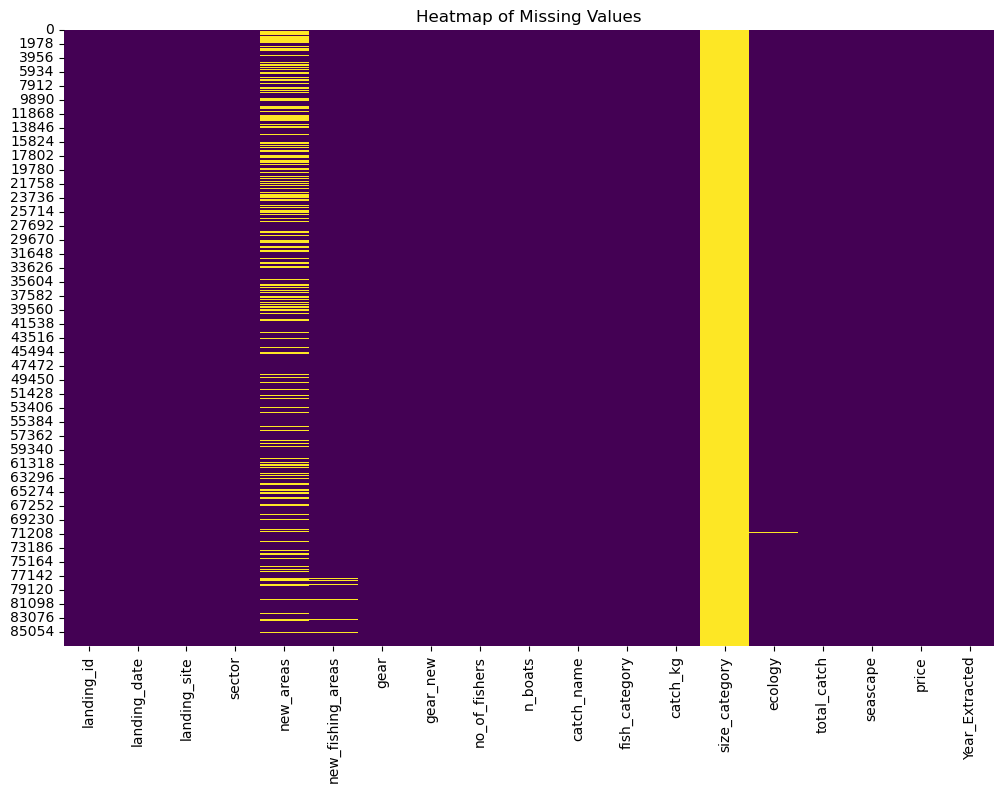

In [29]:
# Visualize missing values using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(main_df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


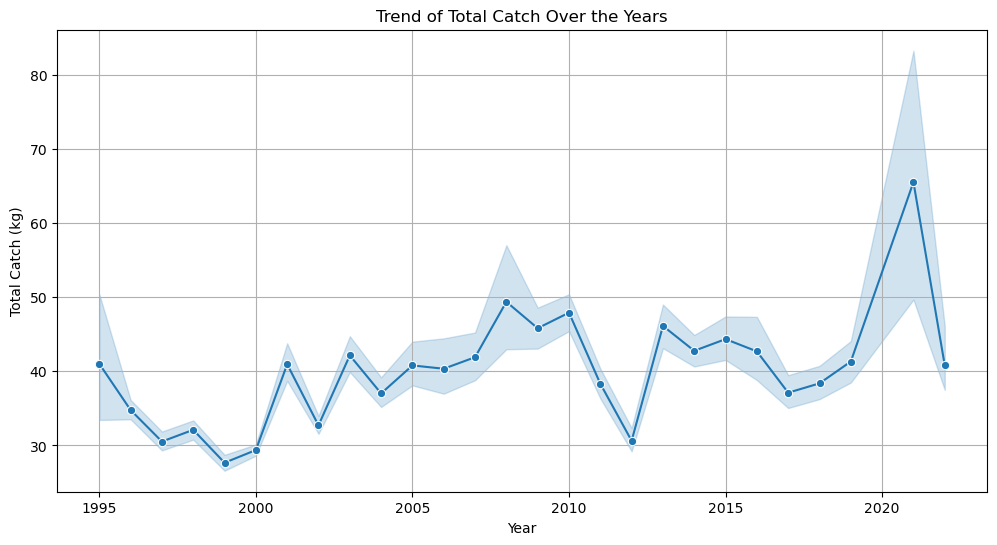

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


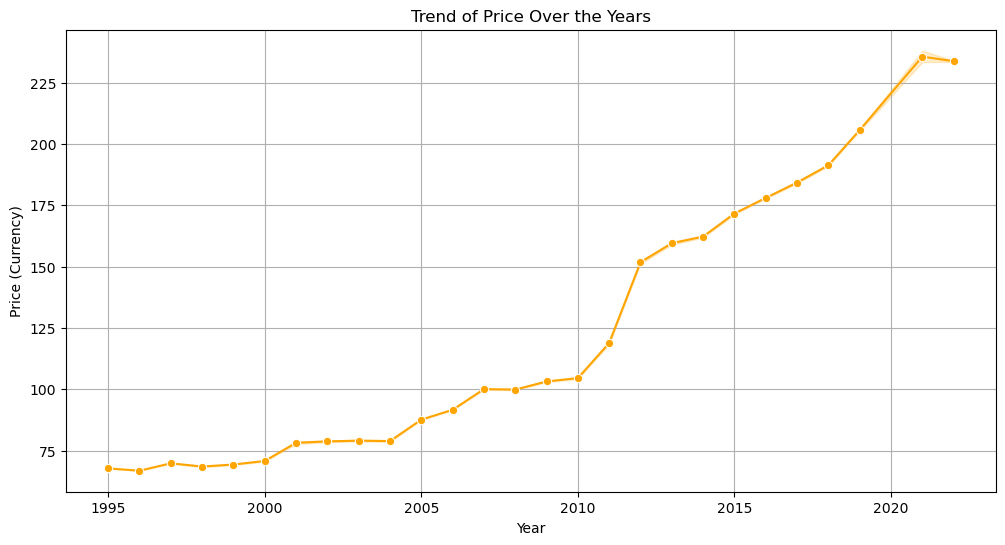

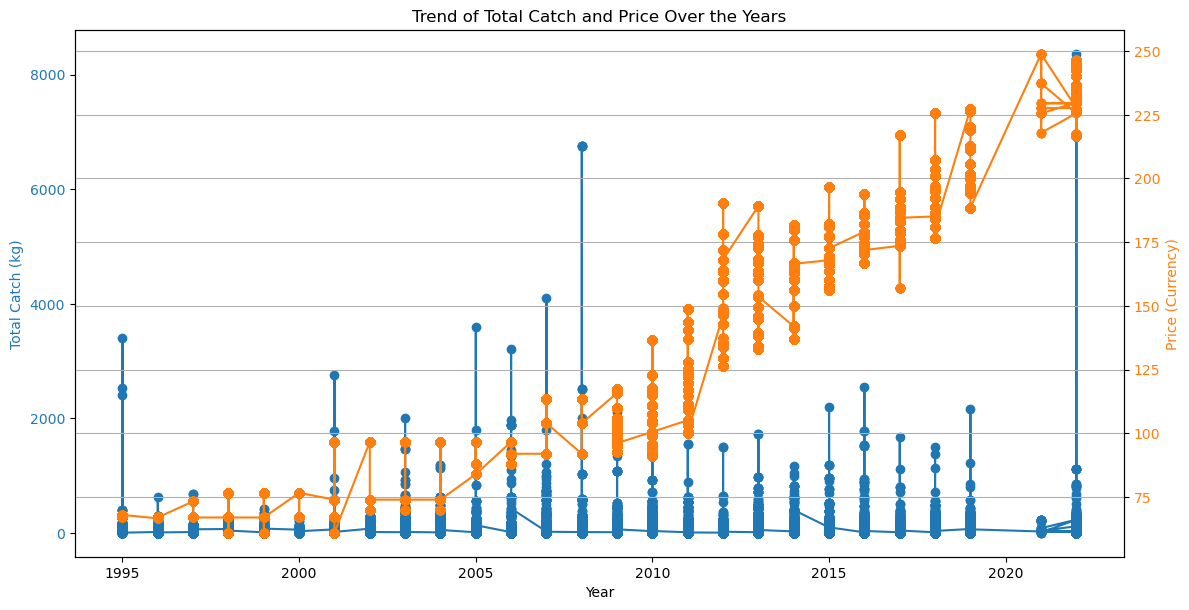

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5: Trend Analysis

# Analyze trends for 'Total catch' over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=main_df, x='Year_Extracted', y='total_catch', marker='o')
plt.title('Trend of Total Catch Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Catch (kg)')
plt.grid(True)
plt.show()

# Analyze trends for 'Price' over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=main_df, x='Year_Extracted', y='price', marker='o', color='orange')
plt.title('Trend of Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Price (Currency)')
plt.grid(True)
plt.show()

# Analyze trends for 'Total catch' and 'Price' together over the years
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Catch (kg)', color='tab:blue')
ax1.plot(main_df['Year_Extracted'], main_df['total_catch'], marker='o', color='tab:blue', label='Total Catch')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Price (Currency)', color='tab:orange')
ax2.plot(main_df['Year_Extracted'], main_df['price'], marker='o', color='tab:orange', label='Price')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()  
plt.title('Trend of Total Catch and Price Over the Years')
plt.grid(True)
plt.show()


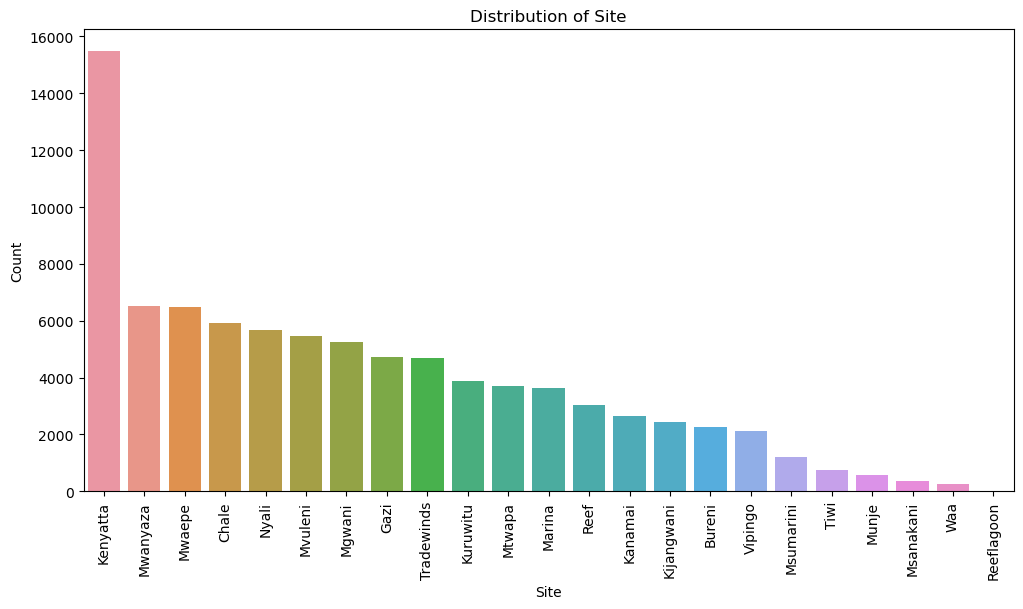

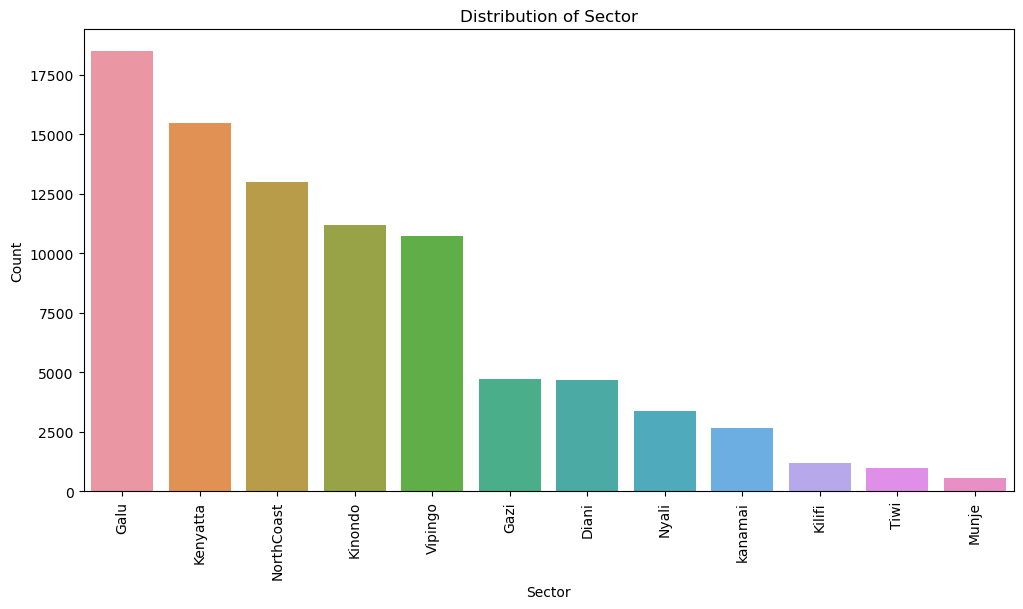

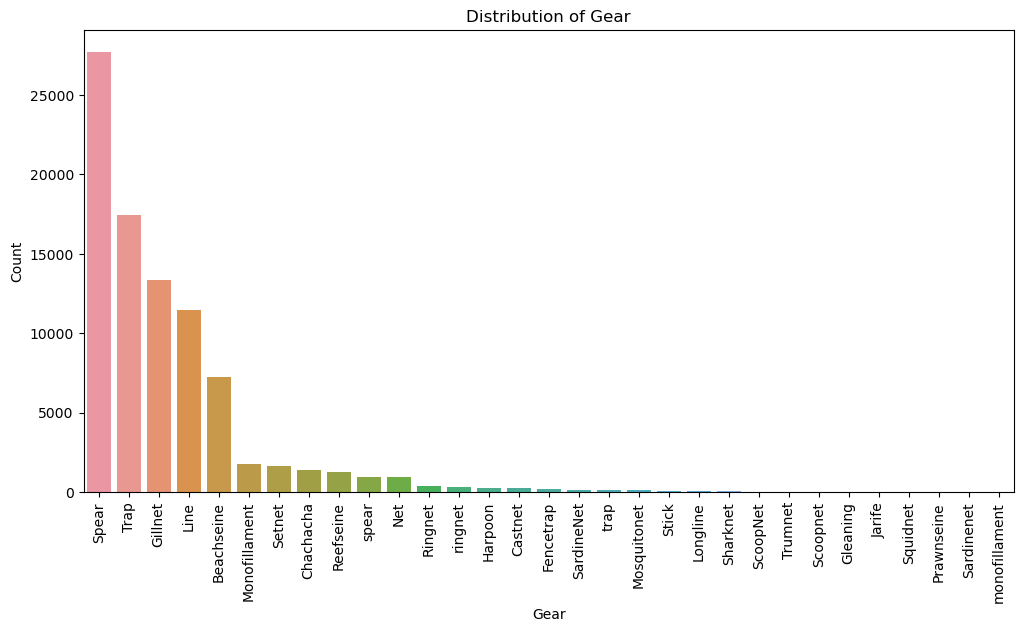

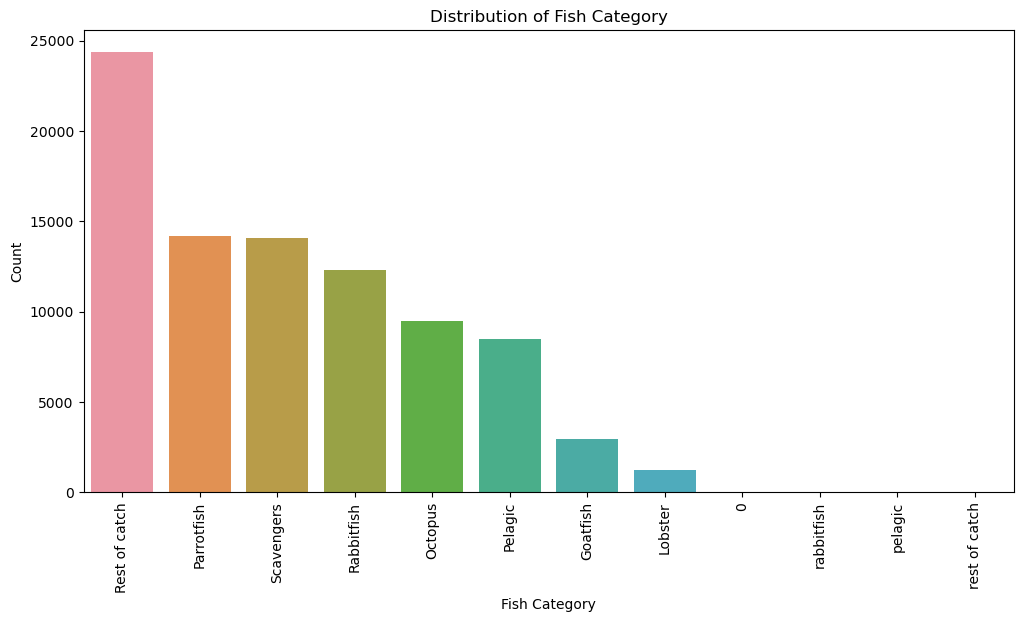

In [33]:

# Step 6: Categorical Analysis

# Function to plot the distribution of categorical variables
def plot_categorical_distribution(df, column, title, xlabel):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

# Analyze the distribution of 'Site'
plot_categorical_distribution(main_df, 'landing_site', 'Distribution of Site', 'Site')

# Analyze the distribution of 'Sector'
plot_categorical_distribution(main_df, 'sector', 'Distribution of Sector', 'Sector')

# Analyze the distribution of 'Gear'
plot_categorical_distribution(main_df, 'gear', 'Distribution of Gear', 'Gear')

# Analyze the distribution of 'Fish category'
plot_categorical_distribution(main_df, 'fish_category', 'Distribution of Fish Category', 'Fish Category')


print_details = False # set this as True if you need to print more details
if print_details:
    # Display value counts for each categorical variable
    print("\nValue counts for 'Site':")
    print(main_df['landing_site'].value_counts())
    
    print("\nValue counts for 'Sector':")
    print(main_df['sector'].value_counts())
    
    print("\nValue counts for 'Gear':")
    print(main_df['gear'].value_counts())
    
    print("\nValue counts for 'Fish category':")
    print(main_df['fish_category'].value_counts())



Correlation matrix:
                   new_areas  new_fishing_areas  no_of_fishers   n_boats  \
new_areas           1.000000           1.000000       0.159712  0.161869   
new_fishing_areas   1.000000           1.000000       0.141885  0.147754   
no_of_fishers       0.159712           0.141885       1.000000  0.383550   
n_boats             0.161869           0.147754       0.383550  1.000000   
catch_kg            0.087116           0.082990       0.163589  0.059684   
total_catch         0.147208           0.144283       0.386519  0.140801   
price              -0.132584          -0.106841      -0.053092 -0.220069   

                   catch_kg  total_catch     price  
new_areas          0.087116     0.147208 -0.132584  
new_fishing_areas  0.082990     0.144283 -0.106841  
no_of_fishers      0.163589     0.386519 -0.053092  
n_boats            0.059684     0.140801 -0.220069  
catch_kg           1.000000     0.737365  0.014294  
total_catch        0.737365     1.000000  0.011299  

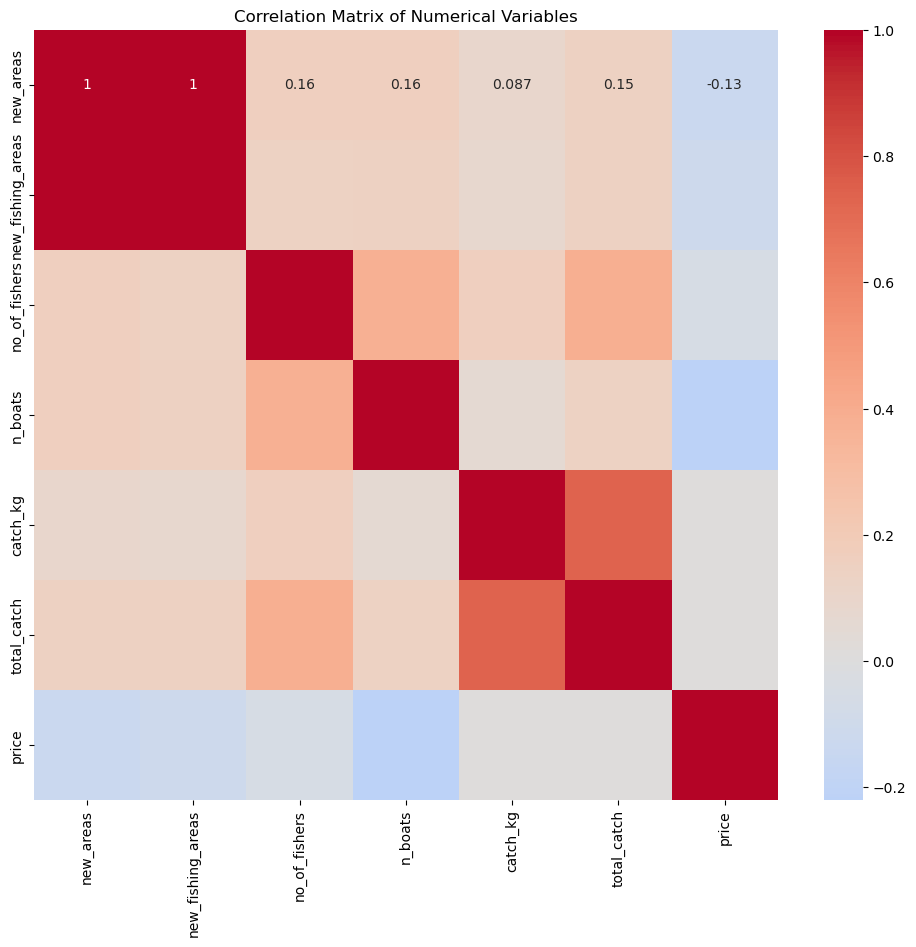


Correlation matrix for variables of interest:
               total_catch     price  no_of_fishers   n_boats
total_catch       1.000000  0.011299       0.386519  0.140801
price             0.011299  1.000000      -0.053092 -0.220069
no_of_fishers     0.386519 -0.053092       1.000000  0.383550
n_boats           0.140801 -0.220069       0.383550  1.000000


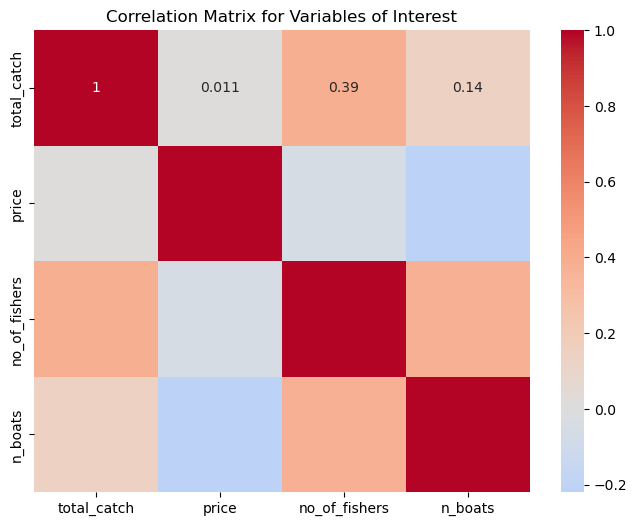

In [34]:

# Step 7: Correlation Analysis

# Select numerical columns for correlation analysis
numerical_cols = main_df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = main_df[numerical_cols].corr()

# Display the correlation matrix
print("\nCorrelation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Optional: Focus on specific variables of interest
variables_of_interest = ['total_catch', 'price', 'no_of_fishers', 'n_boats']
correlation_matrix_focus = main_df[variables_of_interest].corr()

# Display the correlation matrix for variables of interest
print("\nCorrelation matrix for variables of interest:")
print(correlation_matrix_focus)

# Visualize the correlation matrix for variables of interest using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_focus, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Variables of Interest')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


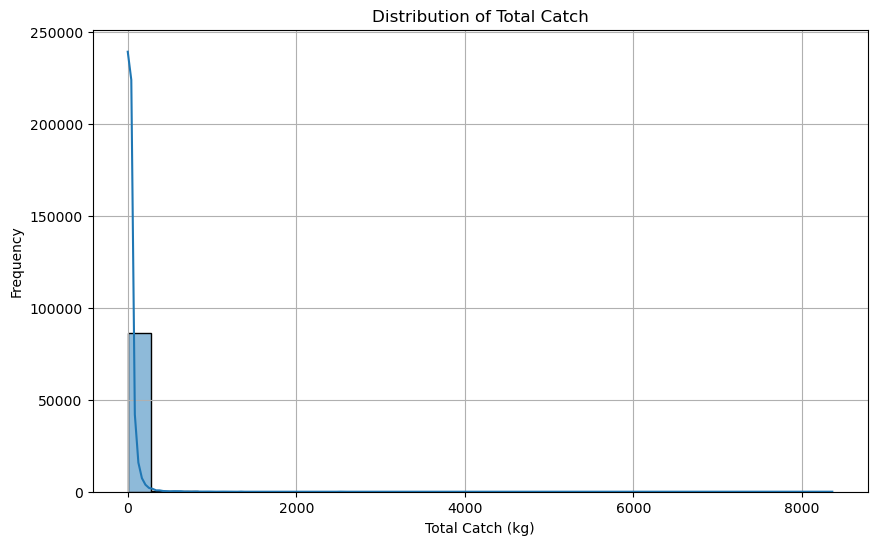

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


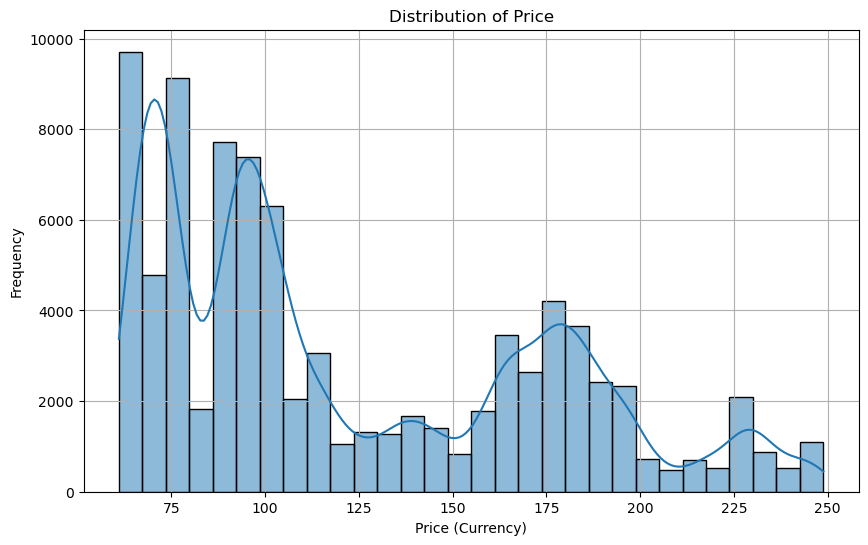

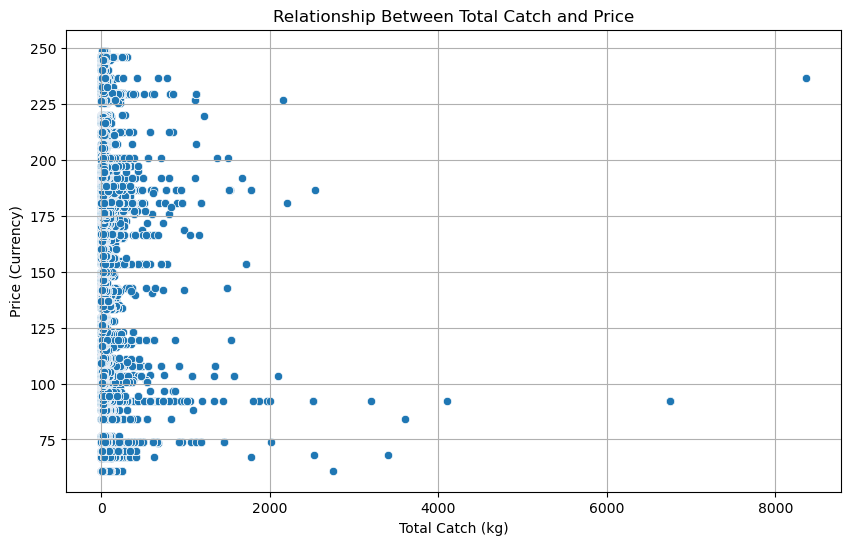

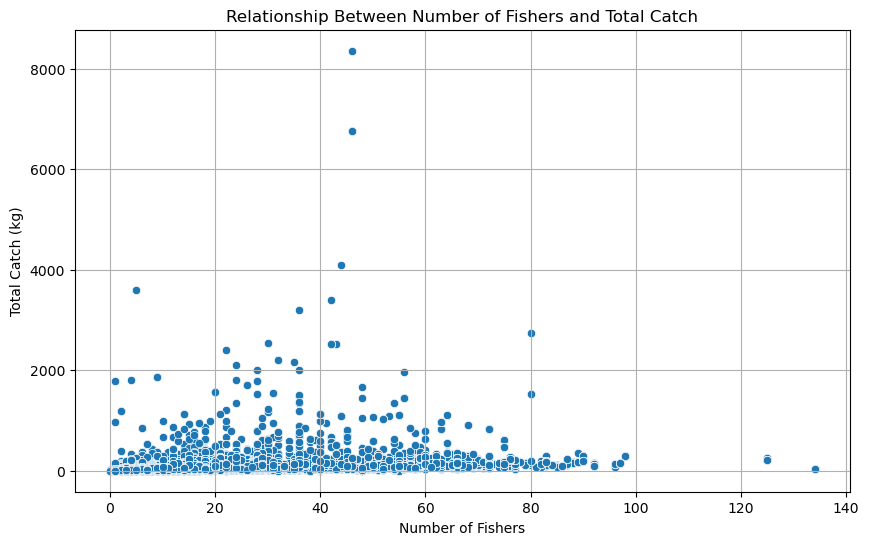

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


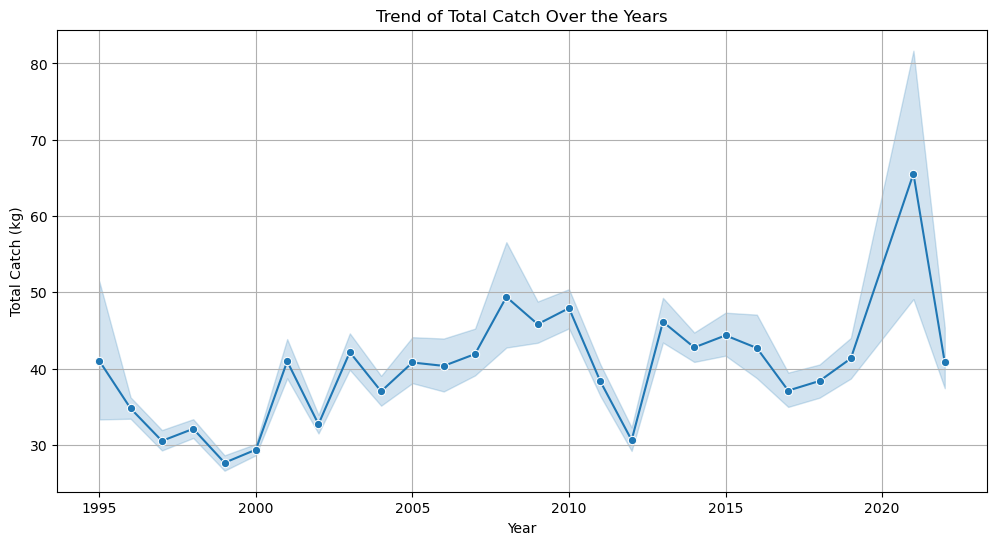

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


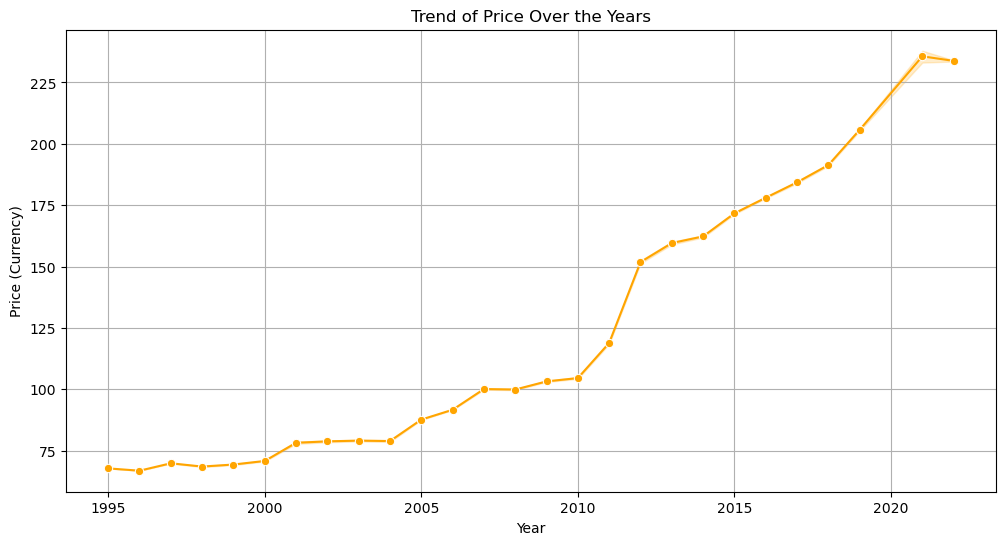

In [35]:

# Function to plot the distribution of numerical variables
def plot_numerical_distribution(df, column, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), kde=True, bins=30)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Function to plot scatter plots for relationships between variables
def plot_relationship(df, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# 1. Distribution of Numerical Variables

# Distribution of 'Total catch'
plot_numerical_distribution(main_df, 'total_catch', 'Distribution of Total Catch', 'Total Catch (kg)')

# Distribution of 'Price'
plot_numerical_distribution(main_df, 'price', 'Distribution of Price', 'Price (Currency)')

# 2. Relationship Between Key Variables

# Relationship between 'Total catch' and 'Price'
plot_relationship(main_df, 'total_catch', 'price', 'Relationship Between Total Catch and Price', 'Total Catch (kg)', 'Price (Currency)')

# Relationship between 'No. of fishers' and 'Total catch'
plot_relationship(main_df, 'no_of_fishers', 'total_catch', 'Relationship Between Number of Fishers and Total Catch', 'Number of Fishers', 'Total Catch (kg)')

# 3. Trends Over Time for Key Variables

# Trends for 'Total catch' over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=main_df, x='Year_Extracted', y='total_catch', marker='o')
plt.title('Trend of Total Catch Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Catch (kg)')
plt.grid(True)
plt.show()

# Trends for 'Price' over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=main_df, x='Year_Extracted', y='price', marker='o', color='orange')
plt.title('Trend of Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Price (Currency)')
plt.grid(True)
plt.show()

# 4. Categorical Variable Distributions

# Function to plot the distribution of categorical variables
def plot_categorical_distribution(df, column, title, xlabel):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()



In [ ]:
# moving avarages and trends
# 5 treatments
# if u provide info to fishermen - will it change the behavour?
# neldoritch
# mombasa